# Evaluator Imobiliar Automat

### De ce ? Cum ce ma ajuta ?

- Vom verifica cat de bun este modelul de regresie liniara multipla si daca trece testele il vom folosi ca un instrument de evaluare, adica:

    - Userul introduce Suprafata, Zona, Camere -> Modelul ii spune "Pretul corect pentru acest apartament este X euro. Daca vanzatorul scere +20%, este o supraevaluare"

### Impact

**Cumparatorii negociaza mai bine pretul si pot evita overtele cu preturi umflate.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
path_to_dataset = '../data/processed/2_clean_data.csv'

if not os.path.isfile(path_to_dataset):
    print('not a file')

In [3]:
df = pd.read_csv(path_to_dataset)

df.head(n = 5)

,Unnamed: 0,Pret,Suprafata_Utila,Camere,Pret_mp,Zona,Vechime_Imobil,Compartimentare,Tip_Zona
0,0,72500,41.0,1,1768.29,Nicolina-CUG,Nou (Post-2000),Decomandat,Accesibil/Rezidential
1,2,180000,72.4,3,2486.19,Centru-Civic,Nou (Post-2000),Decomandat,Premium
2,11,106000,50.0,2,2120.00,Nicolina-CUG,Nou (Post-2000),Decomandat,Accesibil/Rezidential
3,12,73500,57.0,2,1289.47,Tatarasi-Tudor,Vechi (Pre-1977),Semidecomandat,Standard/Urban
4,17,105000,80.0,3,1312.50,Bucium,Nou (Post-2000),Nespecificat,Periferie


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pret             520 non-null    int64  
 1   Suprafata_Utila  520 non-null    float64
 2   Camere           520 non-null    int64  
 3   Pret_mp          520 non-null    float64
 4   Zona             520 non-null    object 
 5   Vechime_Imobil   520 non-null    object 
 6   Compartimentare  520 non-null    object 
 7   Tip_Zona         520 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 32.6+ KB


In [8]:
df.shape

(520, 8)

In [9]:
df[['Suprafata_Utila', 'Camere', 'Tip_Zona']].describe()

,Suprafata_Utila,Camere
count,520.000000,520.000000
mean,53.728731,2.132692
std,14.590003,0.688250
min,20.000000,1.000000
25%,43.000000,2.000000
50%,53.000000,2.000000
75%,64.000000,3.000000
max,91.610000,3.000000


Transformam variabila categoriala in dummy si eliminam prima categorie pentru a servi drept referinta, drop_first = True

In [15]:
X_multi = df[['Suprafata_Utila', 'Camere', 'Tip_Zona']]

In [16]:
X_multi_dummies = pd.get_dummies(X_multi, columns=['Tip_Zona'], drop_first=True)

In [18]:
X_multi_dummies = sm.add_constant(X_multi_dummies)
X_multi_dummies = X_multi_dummies.astype(float)

y = df['Pret']

model_multi = sm.OLS(y, X_multi_dummies).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pret   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     333.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          1.11e-158
Time:                        15:02:57   Log-Likelihood:                -5714.2
No. Observations:                 520   AIC:                         1.144e+04
Df Residuals:                     514   BIC:                         1.147e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6

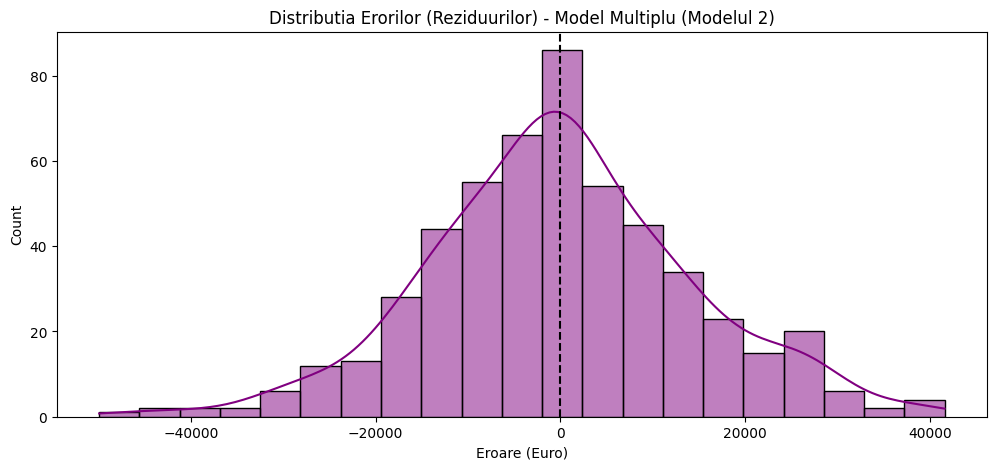

In [19]:
y_pred_multi = model_multi.predict(X_multi_dummies)
plt.figure(figsize=(12, 5))
reziduuri = y - y_pred_multi

sns.histplot(reziduuri, kde=True, color='purple')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Distributia Erorilor (Reziduurilor) - Model Multiplu (Modelul 2)')
plt.xlabel('Eroare (Euro)')
plt.show()

In [22]:
X = df[['Suprafata_Utila', 'Camere', 'Tip_Zona', 'Vechime_Imobil']]
X = pd.get_dummies(X, columns=['Tip_Zona', 'Vechime_Imobil'], drop_first=True)

X = sm.add_constant(X)
X = X.astype(float)

y = df['Pret']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pret   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          3.28e-158
Time:                        15:41:20   Log-Likelihood:                -5709.4
No. Observations:                 520   AIC:                         1.143e+04
Df Residuals:                     512   BIC:                         1.147e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

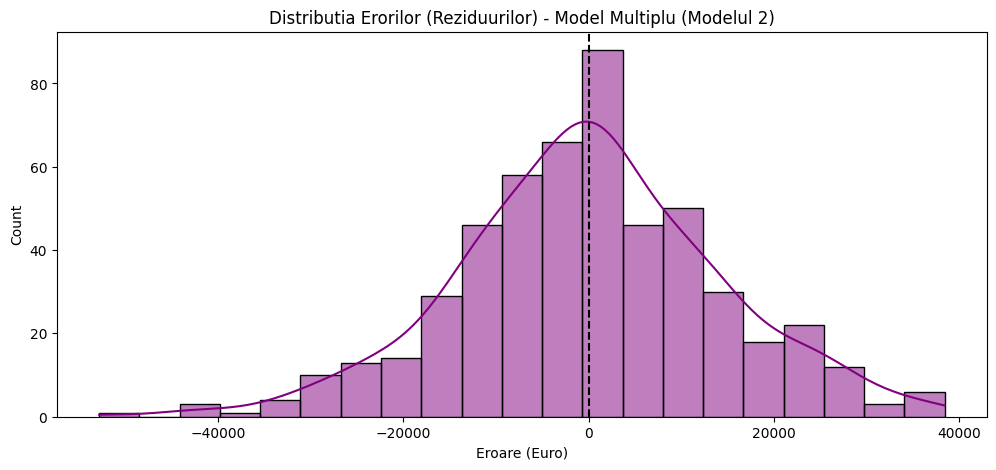

In [23]:
y_pred_multi = model.predict(X)
plt.figure(figsize=(12, 5))
reziduuri = y - y_pred_multi

sns.histplot(reziduuri, kde=True, color='purple')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Distributia Erorilor (Reziduurilor) - Model Multiplu (Modelul 2)')
plt.xlabel('Eroare (Euro)')
plt.show()

In [24]:
import joblib

joblib.dump(model, '../models/model_pret_iasi.pkl')

model_columns = list(X.columns)
joblib.dump(model_columns, '../models/model_columns.pkl')

['../models/model_columns.pkl']

In [30]:
def evalueaza_apartament(suprafata, camere, zona):
    model = joblib.load('../models/model_pret_iasi.pkl')
    cols = joblib.load('../models/model_columns.pkl')
    
    import pandas as pd
    input_df = pd.DataFrame([pd.Series(0, index=cols)])
    
    input_df['Suprafata_Utila'] = suprafata
    input_df['Camere'] = camere
    
    col_zona = 'Tip_Zona_' + zona
    if col_zona in input_df.columns:
        input_df[col_zona] = 1
        
    pret_estimat = model.predict(input_df)[0]
    return round(pret_estimat, 2)

In [26]:
df[(df['Tip_Zona'] == 'Accesibil/Rezidential') & df['Suprafata_Utila'].between(50, 70)]['Pret'].mean()

np.float64(106863.76086956522)

In [31]:
predictie = evalueaza_apartament(55, 2, 'Accesibil/Rezidential')
predictie

np.float64(95196.58)